In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Dados/data_tratado.csv', sep=";")
df_interpolate=pd.read_csv('Dados/df_interpolate.csv', sep=";")
pd.set_option('display.max_columns', 30)

### Criando algumas colunas para ajudar na análise.

In [3]:
def prepara_EDA(df):
    df.loc[:,'DT_MEDICAO'] =  pd.to_datetime(df.loc[:,'DT_MEDICAO'], format='%Y-%m-%d')
    #criando a coluna mês
    df.loc[:,'MES'] = df.loc[:,'DT_MEDICAO'].dt.month
    #criando a coluna ano
    df.loc[:,'ANO'] = df.loc[:,'DT_MEDICAO'].dt.year

In [4]:
prepara_EDA(df)
prepara_EDA(df_interpolate)

In [5]:
df.nunique(axis=0)

DC_NOME             1
PRE_INS           250
TEM_SEN           341
VL_LATITUDE         1
PRE_MAX           248
UF                  1
RAD_GLO         34900
PTO_INS           262
TEM_MIN           311
VL_LONGITUDE        1
UMD_MIN            88
PTO_MAX           255
VEN_DIR           360
DT_MEDICAO       2557
CHUVA             140
PRE_MIN           251
UMD_MAX            87
VEN_VEL            83
PTO_MIN           268
TEM_MAX           319
VEN_RAJ           198
TEM_INS           316
UMD_INS            87
CD_ESTACAO          1
HR_MEDICAO         24
HORA               24
RAD             30451
MES                12
ANO                 7
dtype: int64

In [6]:
df.columns

Index(['DC_NOME', 'PRE_INS', 'TEM_SEN', 'VL_LATITUDE', 'PRE_MAX', 'UF',
       'RAD_GLO', 'PTO_INS', 'TEM_MIN', 'VL_LONGITUDE', 'UMD_MIN', 'PTO_MAX',
       'VEN_DIR', 'DT_MEDICAO', 'CHUVA', 'PRE_MIN', 'UMD_MAX', 'VEN_VEL',
       'PTO_MIN', 'TEM_MAX', 'VEN_RAJ', 'TEM_INS', 'UMD_INS', 'CD_ESTACAO',
       'HR_MEDICAO', 'HORA', 'RAD', 'MES', 'ANO'],
      dtype='object')

|CODIGO  | ATRIBUTO	DESCRIÇÃO	                 |UNIDADE|
|--------|---------------------------------------|-------|
|VEN_DIR |VENTO, DIREÇÃO HORARIA 	             |° (gr) |
|CHUVA   |PRECIPITAÇÃO TOTAL, HORÁRIO	         |mm     |
|PRE_INS |PRESSÃO ATMOSFÉRICA AO NÍVEL DA ESTACÃO|mB     |
|PRE_MIN |PRESSÃO ATMOSFÉRICA MIN. NA HORA ANT.  |mB     |
|UMD_MAX |UMIDADE REL. MAX. NA HORA ANT.         |%      |
|PRE_MAX |PRESSÃO ATMOSFÉRICA MAX.NA HORA ANT.   |mB     |
|VEN_VEL |VENTO, VELOCIDADE HORARIA	             |m/s    |
|PTO_MIN |TEMPERATURA ORVALHO MIN. NA HORA ANT.  |°C     |
|TEM_MAX |TEMPERATURA MÁXIMA NA HORA ANT.        |°C     |
|RAD_GLO |RADIAÇÃO GLOBAL	                     |KJ/m²  |
|PTO_INS |TEMPERATURA DO PONTO DE ORVALHO	     |°C     |
|VEN_RAJ |VENTO, RAJADA MÁXIMA	                 |m/s    |
|TEM_INS |TEMPERATURA DO AR - BULBO SECO, HORARIA|°C     |
|UMD_INS |UMIDADE RELATIVA DO AR, HORARIA	     |%      |
|TEM_MIN |TEMPERATURA MÍNIMA NA HORA ANT. (AUT)	 |°C     |
|UMD_MIN |UMIDADE REL. MIN. NA HORA ANT. (AUT)	 |%      |
|PTO_MAX |TEMPERATURA ORVALHO MAX. NA HORA ANT.  |°C     |

### Correlacao

In [7]:
from funcoes_eda import correlacao
correlacao(df)

spearman


UMD_MIN      -0.940909
UMD_INS      -0.940182
UMD_MAX      -0.927915
CHUVA        -0.491000
PRE_INS      -0.319127
PRE_MIN      -0.304486
PRE_MAX      -0.301142
PTO_MIN      -0.205074
PTO_INS      -0.113287
MES          -0.045508
ANO          -0.040118
PTO_MAX      -0.011188
VEN_VEL       0.487571
VEN_RAJ       0.550964
HORA          0.581056
VEN_DIR       0.627830
TEM_SEN       0.646937
TEM_MIN       0.749619
TEM_INS       0.779715
TEM_MAX       0.792855
HR_MEDICAO    0.883083
RAD           1.000000
Name: RAD, dtype: float64

pearson


UMD_INS      -0.955638
UMD_MIN      -0.952687
UMD_MAX      -0.944600
PRE_INS      -0.352776
PRE_MIN      -0.333507
PRE_MAX      -0.328296
PTO_MIN      -0.325219
CHUVA        -0.269142
PTO_INS      -0.232640
PTO_MAX      -0.114398
MES          -0.035248
ANO          -0.009363
VEN_VEL       0.451027
VEN_RAJ       0.493108
HORA          0.547004
VEN_DIR       0.685434
TEM_SEN       0.713475
TEM_MIN       0.811247
HR_MEDICAO    0.813263
TEM_INS       0.835937
TEM_MAX       0.840727
RAD           1.000000
Name: RAD, dtype: float64

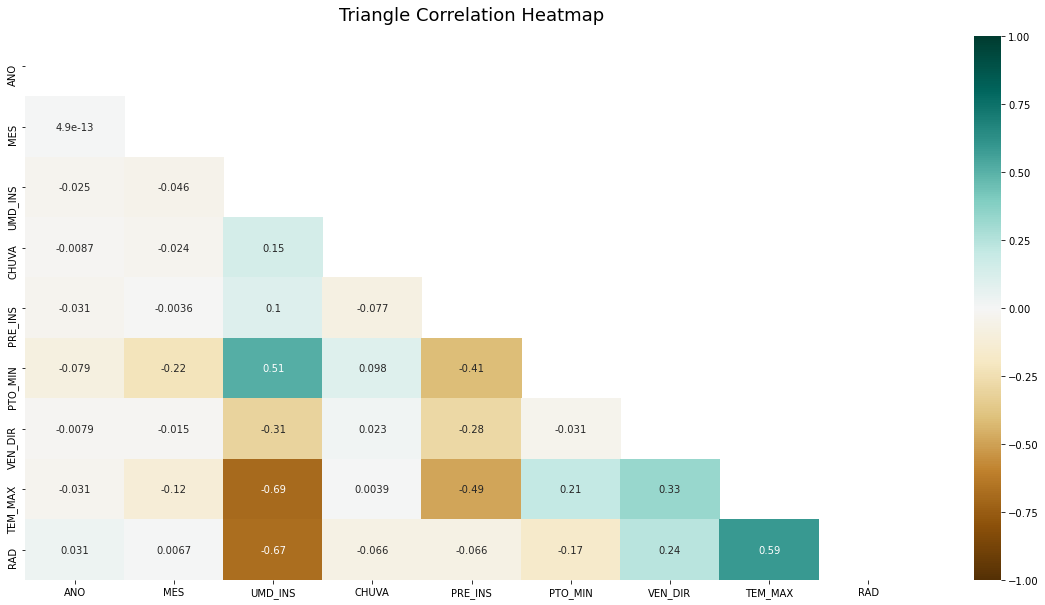

In [8]:
from funcoes_eda import corr_triangle
features = ['DT_MEDICAO','ANO','MES','UMD_INS','CHUVA','PRE_INS','PTO_MIN','VEN_DIR','TEM_MAX','RAD']
corr_triangle(df[features])

## Selecionando apenas algumas features:

In [9]:
features = ['DT_MEDICAO','ANO','MES','HORA','UMD_INS','CHUVA','PRE_INS','PTO_MIN','VEN_DIR','TEM_MAX','RAD']

var_tempo = 'DT_MEDICAO'
var_categoricas = ['ANO','MES']
var_numericas = ['UMD_INS','CHUVA','PRE_INS','PTO_MIN','VEN_DIR','TEM_MAX','RAD']
target = 'RAD'

eda = df[features]

In [10]:
eda.describe().T.round(2)

count     mean      std     min      25%      50%      75%      max
ANO      61368.0  2018.00     2.00  2015.0  2016.00  2018.00  2020.00  2021.00
MES      61368.0     6.52     3.45     1.0     4.00     7.00    10.00    12.00
HORA     61368.0    11.50     6.92     0.0     5.75    11.50    17.25    23.00
UMD_INS  61368.0    68.33    16.83    12.0    58.00    73.00    81.00    98.00
CHUVA    61368.0     0.18     1.43     0.0     0.00     0.00     0.00    77.80
PRE_INS  61368.0   927.29     3.63   914.7   924.80   927.10   929.60   940.30
PTO_MIN  61368.0    13.43     3.70    -8.6    11.20    14.00    16.30    21.50
VEN_DIR  61368.0   154.54    92.79     1.0    86.00   131.00   191.00   360.00
TEM_MAX  61368.0    21.13     4.74     4.5    17.80    20.80    24.10    37.40
RAD      61368.0   753.88  1128.60     0.0     0.00    12.43  1271.24  3999.61

### Para valores diários:

In [11]:
eda_dia = eda.groupby('DT_MEDICAO').agg({'RAD'    :'sum',
                                         'CHUVA'  :'sum',
                                         'ANO'    :'mean',
                                         'MES'    :'mean',
                                         'PRE_INS':'mean',
                                         'UMD_INS':'mean',
                                         'PTO_MIN':'mean',
                                         'VEN_DIR':'mean',
                                         'TEM_MAX':'mean'})
eda_dia

RAD  CHUVA   ANO  MES     PRE_INS    UMD_INS    PTO_MIN  \
DT_MEDICAO                                                                  
2015-01-01  28172.702    0.0  2015    1  924.441667  52.500000  15.591667   
2015-01-02  21412.210    0.2  2015    1  924.295833  53.750000  16.258333   
2015-01-03  13982.863    1.4  2015    1  926.641667  73.875000  19.008333   
2015-01-04  13622.406    0.0  2015    1  927.608333  71.875000  17.550000   
2015-01-05  14505.361   12.6  2015    1  927.804167  76.250000  17.591667   
...               ...    ...   ...  ...         ...        ...        ...   
2021-12-27  21132.838    3.2  2021   12  922.450000  60.958333  13.533333   
2021-12-28  18349.341    1.6  2021   12  924.200000  71.083333  15.162500   
2021-12-29  26594.520    0.0  2021   12  926.225000  72.000000  15.800000   
2021-12-30  11169.776    4.0  2021   12  923.837500  77.833333  16.508333   
2021-12-31  10015.401   32.8  2021   12  920.037500  90.041667  17.608333   

               VEN_DIR    TEM_MAX  
DT_MEDICAO                         
2015-01-01  289.541667  27.779167  
2015-01-02  261.250000  27.870833  
2015-01-03  134.208333  25.125000  
2015-01-04  180.083333  24.050000  
2015-01-05  109.666667  23.391667  
...                ...        ...  
2021-12-27  129.750000  23.566667  
2021-12-28  175.500000  22.129167  
2021-12-29  152.458333  22.554167  
2021-12-30  142.458333  21.279167  
2021-12-31  130.916667  20.183333  

[2557 rows x 9 columns]

In [12]:
eda_dia.describe().T.round(2)

count      mean      std      min       25%       50%       75%  \
RAD      2557.0  18093.14  7236.07     0.00  13232.30  18482.22  23404.29   
CHUVA    2557.0      4.28    11.31     0.00      0.00      0.00      2.00   
ANO      2557.0   2018.00     2.00  2015.00   2016.00   2018.00   2020.00   
MES      2557.0      6.52     3.45     1.00      4.00      7.00     10.00   
PRE_INS  2557.0    927.29     3.44   917.47    924.95    927.02    929.45   
UMD_INS  2557.0     68.33    10.11    28.25     63.17     69.50     74.96   
PTO_MIN  2557.0     13.43     3.33    -0.17     11.13     13.93     16.18   
VEN_DIR  2557.0    154.54    49.78    60.96    119.67    143.17    176.12   
TEM_MAX  2557.0     21.13     3.41     8.23     18.75     21.33     23.64   

              max  
RAD      34946.17  
CHUVA      143.00  
ANO       2021.00  
MES         12.00  
PRE_INS    938.88  
UMD_INS     92.21  
PTO_MIN     19.77  
VEN_DIR    328.62  
TEM_MAX     31.86

In [13]:
def tirando_horas_sem_radiacao(df):
    condicao_irradiacao = (df.HORA>7)&(df.HORA<20)  
    df = df[condicao_irradiacao]
    return df

ts = tirando_horas_sem_radiacao(eda)
ts_dia = ts.groupby('DT_MEDICAO').agg({'RAD':'sum',
                                       'CHUVA':'sum',
                                       'ANO':'mean',
                                       'MES':'mean',
                                       'PRE_INS':'mean',
                                       'UMD_INS':'mean',
                                       'PTO_MIN':'mean',
                                       'VEN_DIR':'mean',
                                       'TEM_MAX':'mean'})

In [46]:
ts_dia.describe().T.round(2)

count      mean      std      min       25%       50%       75%  \
RAD      2557.0  17862.51  7093.81     0.00  13082.41  18355.01  23126.43   
CHUVA    2557.0      2.45     7.55     0.00      0.00      0.00      0.40   
ANO      2557.0   2018.00     2.00  2015.00   2016.00   2018.00   2020.00   
MES      2557.0      6.52     3.45     1.00      4.00      7.00     10.00   
PRE_INS  2557.0    927.18     3.55   916.72    924.75    926.90    929.42   
UMD_INS  2557.0     59.78    13.20    20.58     51.58     60.17     68.83   
PTO_MIN  2557.0     12.92     3.59    -5.20     10.60     13.56     15.77   
VEN_DIR  2557.0    177.53    62.77    50.83    129.25    160.08    222.67   
TEM_MAX  2557.0     23.39     4.01     9.87     20.62     23.69     26.33   

              max  
RAD      33716.53  
CHUVA       93.00  
ANO       2021.00  
MES         12.00  
PRE_INS    938.83  
UMD_INS     91.25  
PTO_MIN     19.77  
VEN_DIR    339.58  
TEM_MAX     34.91

In [47]:
ts_dia.corr(method='spearman')['RAD']

RAD        1.000000
CHUVA     -0.332047
ANO        0.121460
MES        0.020220
PRE_INS   -0.251212
UMD_INS   -0.755537
PTO_MIN   -0.118359
VEN_DIR    0.116930
TEM_MAX    0.695591
Name: RAD, dtype: float64

In [ ]:
def corr_triangle(df):
    '''
    Cria uma matrix de correlação entre as features da df dada, em formato de triangulo.
    ---------------------------------------------------------------
    parâmetro: dataframe que quer ver a correlação
    ---------------------------------------------------------------
    Retorna: Um heatmap em formato triangular das correlações entre as
    features da dataframe informada.
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    plt.figure(figsize=(20, 10))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
    
def graf_tempo_dia(df,coluna_data,target, xlabel='Data da medição[dia]',ylabel='Radiação[KJ/m²]',step = 30):
    
    import matplotlib.pyplot as plt 
    df_dia = df.groupby([coluna_data],as_index=False).mean() 
    plt.figure(facecolor='#f9f9f9',edgecolor= '#4a646c',figsize=(20,5))
    plt.plot(df_dia[coluna_data] , df_dia[target],'o-',color='#0099cb')#
    plt.xlabel(xlabel,fontsize= 15)
    plt.ylabel(ylabel,fontsize=16)
    plt.axhline(df[target].mean(),c = '#ff4040',label=f'{target}_média')
    plt.grid(True, 'both','both')
    plt.xticks(df_dia.iloc[range(0,df_dia.shape[0],step),0],rotation=90)
    plt.legend(fontsize=15);
    
def box_tempo_for(df,figsize=(15,5),coluna_data ='data',
            colunas = var_numericas,
            xlabel = 'Anos',
            #ylabel = 'Radiação diária média (W/m²)',
            palette = None ):
    for col in colunas:
        figsize = figsize
        title = f'Variação de {col} ao longo do Ano '
        fig, ax = plt.subplots(figsize = figsize)
        sns.boxplot(x=coluna_data ,y=col,data = df, ax = ax,palette = palette )
        ax.set(title = title, xlabel = xlabel, ylabel = f'{col}')
        plt.grid(True, 'both','both');
        
def box_plot(df,
             figsize=(10,4),
             x = var_categoricas,
             y = var_numericas):
    import matplotlib.pyplot as plt
    import seaborn as sns
    xlabel = f'{x}'
    ylabel = f'{y}'
    title = f'Variação de {ylabel} por {xlabel}'
    
    fig, ax = plt.subplots(figsize = figsize)
    sns.boxplot(x=x ,y=y ,data=df, linewidth=1.5,showmeans=True, ax = ax)
    ax.set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.grid(True, 'both','both');
    
# função para gerar um histograma a partir de uma variável do data frame
def gerar_histograma(data_frame,
                     variavel, 
                     bins = 30,
                     color = 'purple',
                     #xlabel = xlabel,
                     ylabel = 'Frequência',
                     titulo = 'Histograma',
                     fontsize = 16,
                     fontweight = 'bold',
                     figsize = (8,5)
                    ):
    '''
    Gera um histograma: frequencia de vezes a variável dada repetiu.
    É possível fazer um for. É só colocar:
    for var in lista_variaveis_quantitativa:
        gerar_histograma(df, var)
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    xlabel = f'{variavel}'
    fig, ax = plt.subplots(figsize = figsize)
    sns.histplot(data_frame[variavel], bins = bins, color = color, kde = True)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax.set_title(titulo, fontsize = fontsize, fontweight = fontweight)
    plt.grid(True, 'both','both');
    
# função para gerar um histograma a partir de uma variável do data frame
def gerar_histograma(data_frame,
                     variavel, 
                     bins = 30,
                     color = 'purple',
                     #xlabel = xlabel,
                     ylabel = 'Frequência',
                     titulo = 'Histograma',
                     fontsize = 16,
                     fontweight = 'bold',
                     figsize = (8,5)
                    ):
    '''
    Gera um histograma: frequencia de vezes a variável dada repetiu.
    É possível fazer um for. É só colocar:
    for var in lista_variaveis_quantitativa:
        gerar_histograma(df, var)
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    xlabel = f'{variavel}'
    fig, ax = plt.subplots(figsize = figsize)
    sns.histplot(data_frame[variavel], bins = bins, color = color, kde = True)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax.set_title(titulo, fontsize = fontsize, fontweight = fontweight)
    plt.grid(True, 'both','both');
    
def gerar_Log_histograma(data_frame,
                     variavel, 
                     bins = 30,
                     color = 'purple', 
                     fontsize = 16,
                     fontweight = 'bold',
                     figsize = (8,5)
                    ):
    '''
    Gera um histograma: frequencia de vezes a variável dada repetiu.
    É possível fazer um for. É só colocar:
    for var in lista_variaveis_quantitativa:
        gerar_histograma(df, var)
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    xlabel = f'{variavel}'
    ylabel = 'Frequência'
    titulo = f'Histograma de Log{variavel}'
    fig, ax = plt.subplots(figsize = figsize)
    sns.histplot(np.log(data_frame[variavel]+1), bins = bins, color = color, kde = True)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax.set_title(titulo, fontsize = fontsize, fontweight = fontweight)
    plt.grid(True, 'both','both');

In [ ]:
def graficos_subplot(df_dia ,ano_incial=2011,ano_final=2021, xlabel = 'Data da medição[dia]'):
    '''
    df_dia_(Estação);
    ano_incial = 2011
    ano_incial = 2021
    '''
    import matplotlib.pyplot as plt
    
    ## Para formatação das Legendas 
    name_city = 'São Paulo '    #df_dia['cidade'][0]
    name_estation = 'A701'      #df_dia['estacao'][0]
    
    # Seleciona dias
    ano_incial = ano_incial
    ano_final = ano_final

    anos = range(ano_incial,ano_final,1)
    for ano in anos:
        df = df_dia.query(f'ANO == {ano}')

        fig, ax = plt.subplots(1, 2, figsize=(20, 6))

        ##  ------ RADIAÇÃO GLOBAL W/m²  ------------
        
        fig.suptitle(f'Gráficos da estação {name_estation} em {name_city} no ano {ano}')
        ax[0].plot(df.index , df['RAD'],'o-')
        ax[0].set_xlabel(xlabel,fontsize= 15)
        ax[0].set_ylabel('Radiação[W/m²]',fontsize=16)
        ax[0].axhline(df['RAD'].mean(),c = 'red',label='Radiação_média')
        ax[0].grid(True, 'both','both')
        ax[0].set_title(f'Radiação global diária média[W/m²] durante o ano {ano}')
        #ax[0].set_xticks(df.index.iloc[range(0,df.shape[0],10),0])
        ax[0].tick_params(axis='x', rotation=90)
        ax[0].legend(fontsize=15);

        ##  ------ 'TEM_MAX': TEMPERATURA MÁXIMA NA HORA ANT. °C,  ------------
        ax[1].plot(df.index , df['TEM_MAX'],'o-',color = 'black')
        ax[1].set_title(f'Temperatura[°C] média diária durante o ano {ano}')
        ax[1].set_xlabel(xlabel,fontsize= 15)
        ax[1].set_ylabel('Temperatura[°C]',fontsize=16)
        ax[1].axhline(df['TEM_MAX'].mean(),c = 'red',label='TMax_média')
        ax[1].grid(True, 'both','both')
        #ax[1].set_xticks(df.iloc[range(0,df.shape[0],10),0])
        ax[1].tick_params(axis='x', rotation=90)        
        ax[1].legend(fontsize=15);
    

# Investigando a Target:

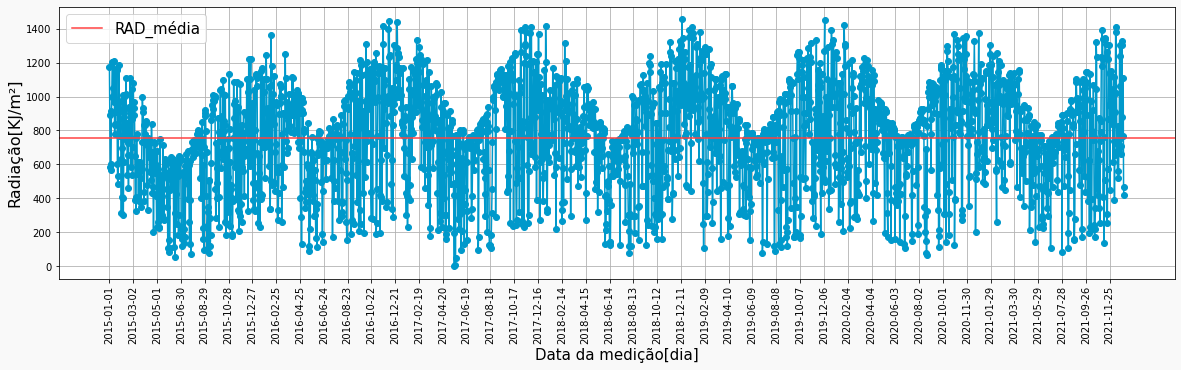

In [16]:
from funcoes_eda import graf_tempo_dia
graf_tempo_dia(eda,'DT_MEDICAO','RAD',step=60 )

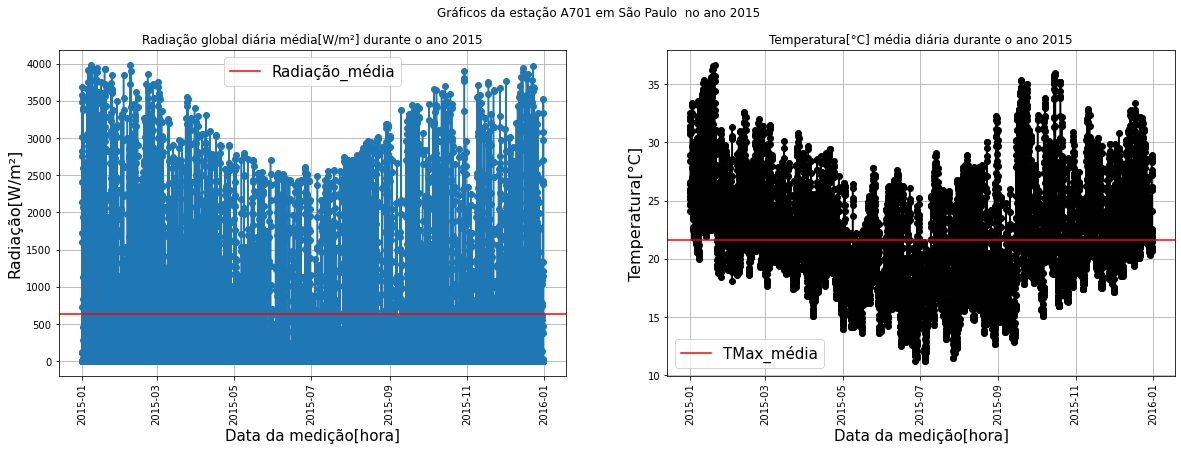

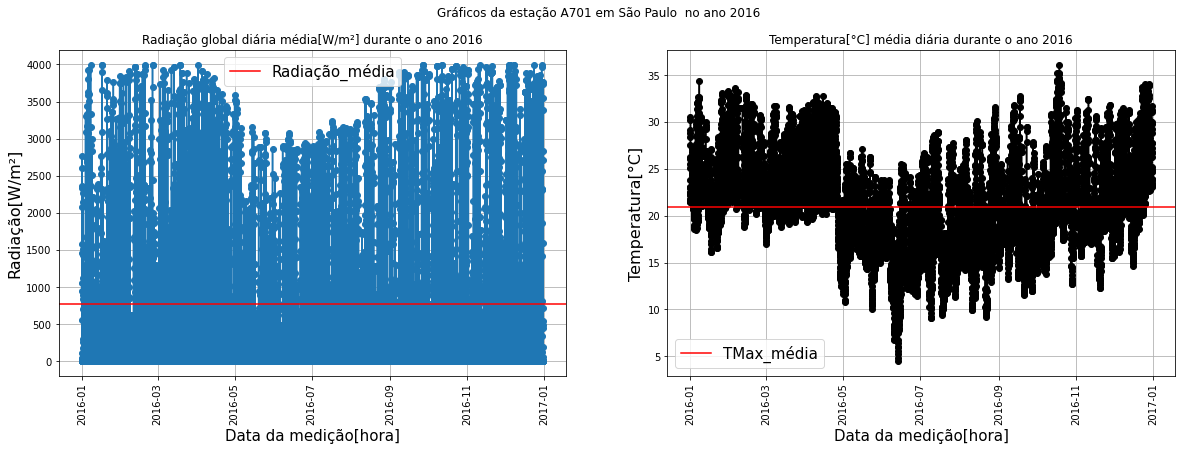

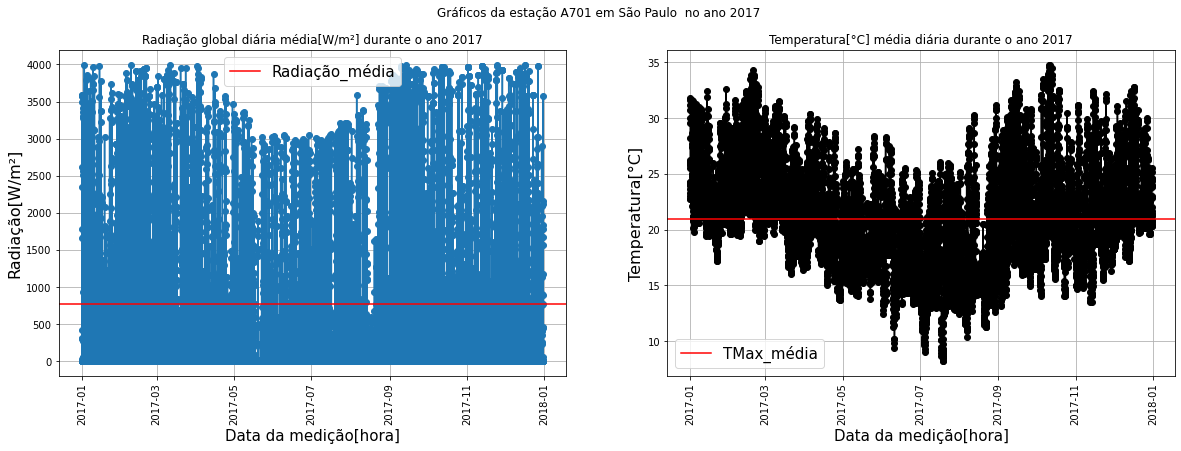

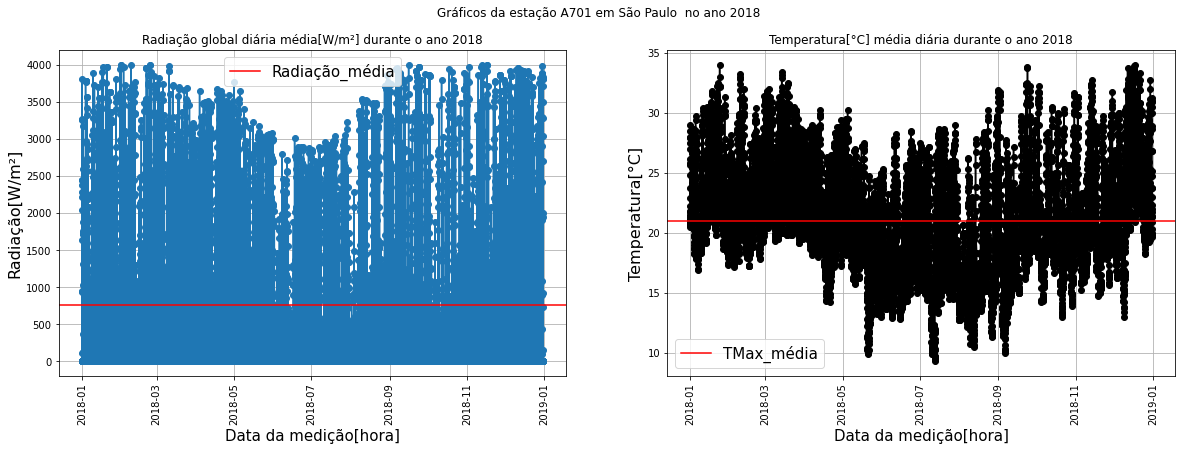

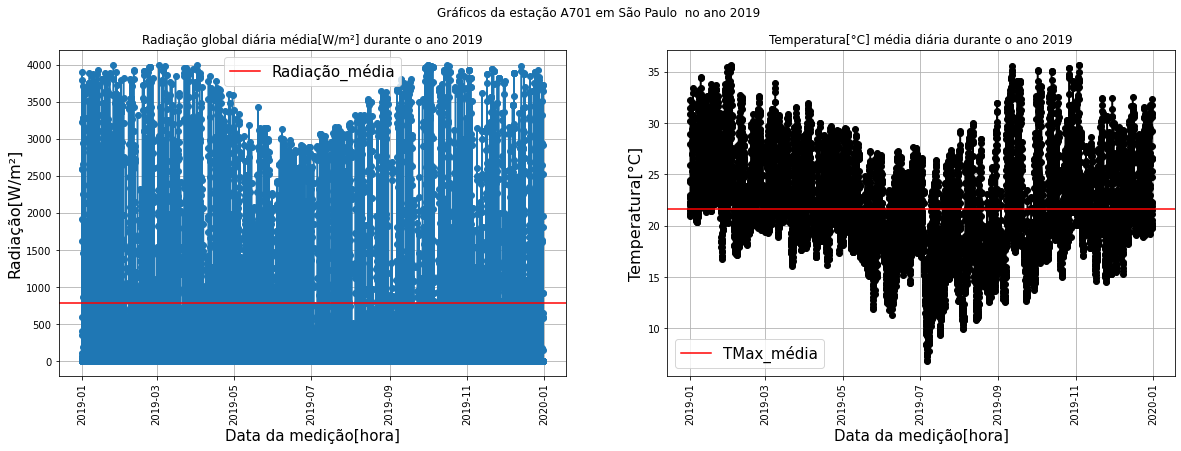

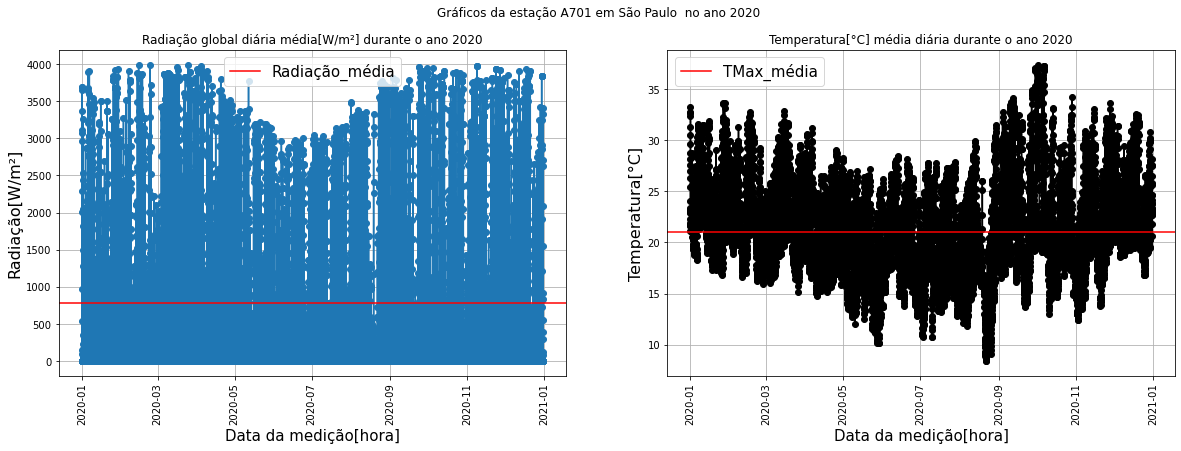

In [17]:
from funcoes_eda import graficos_subplot
graficos_subplot(eda.set_index('DT_MEDICAO') ,ano_incial=2015,ano_final=2021,xlabel='Data da medição[hora]')

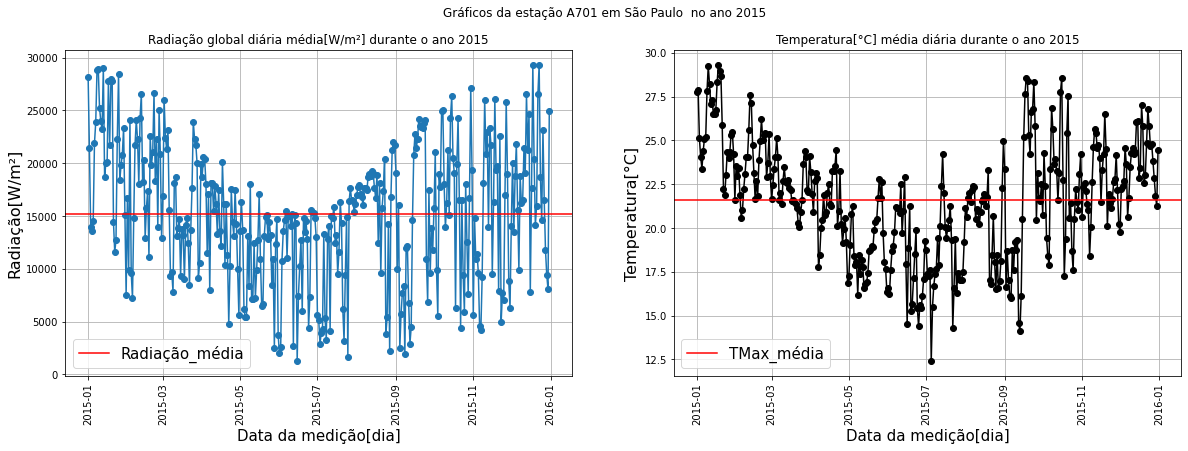

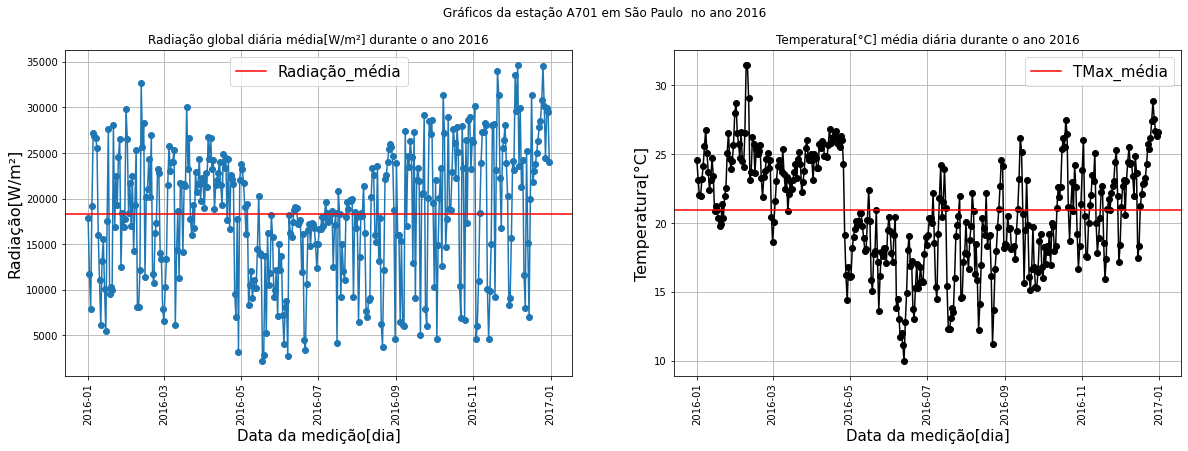

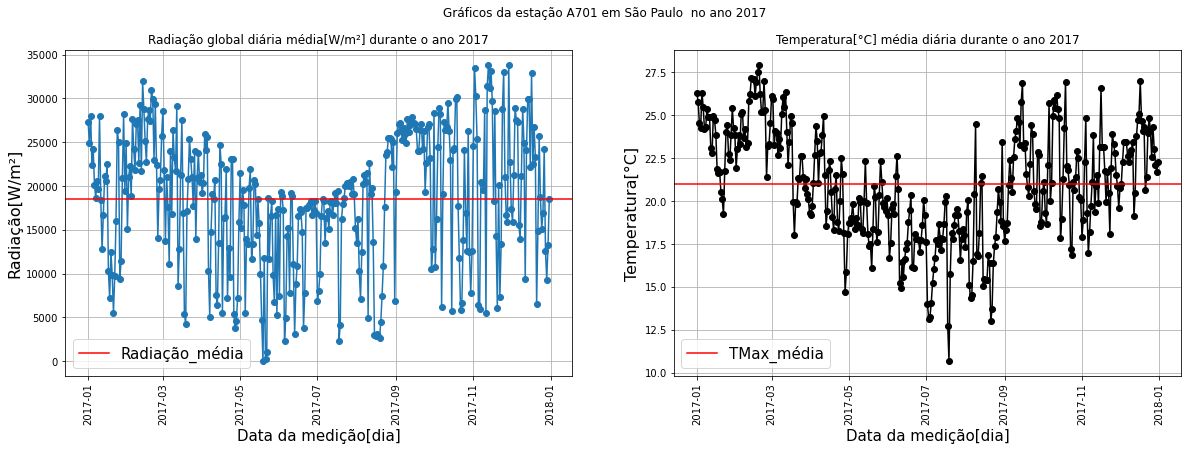

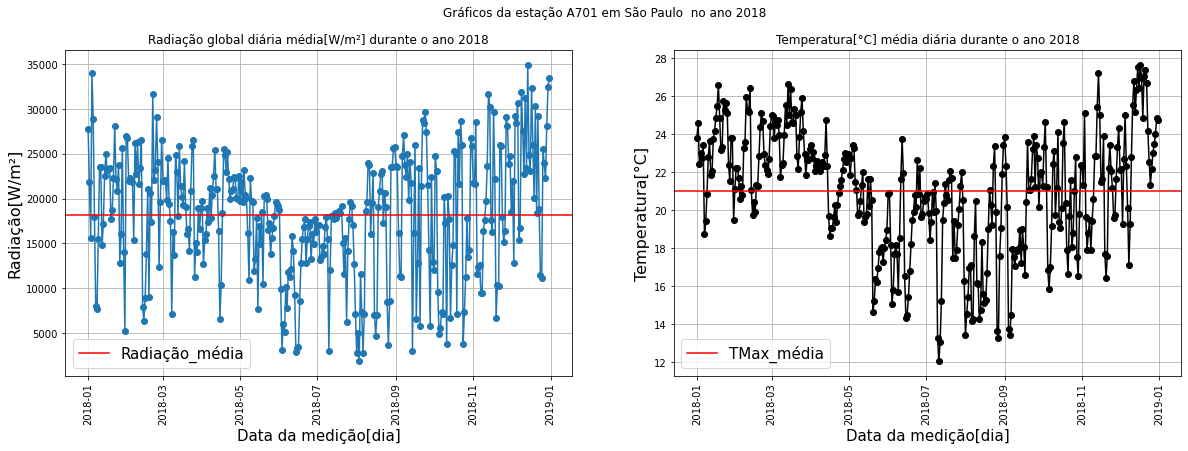

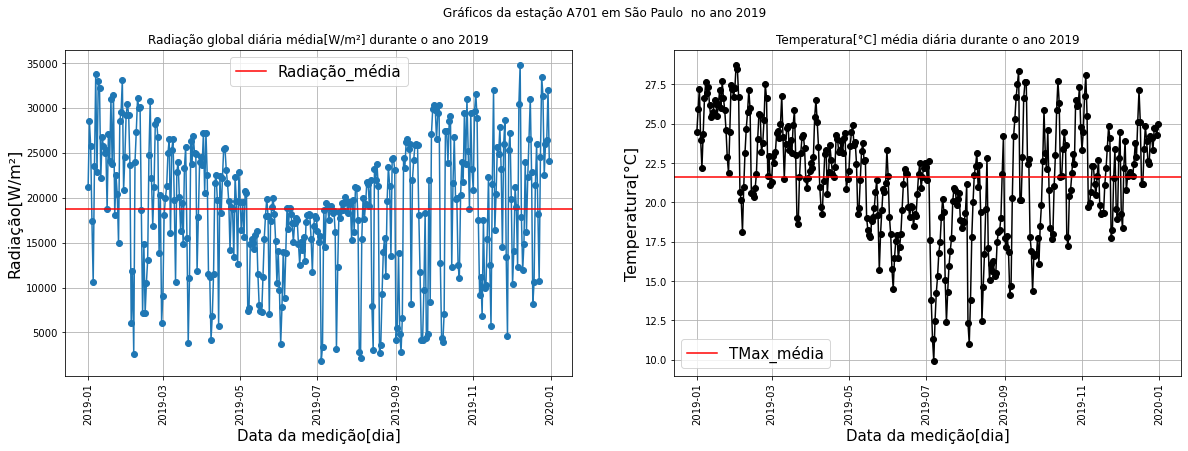

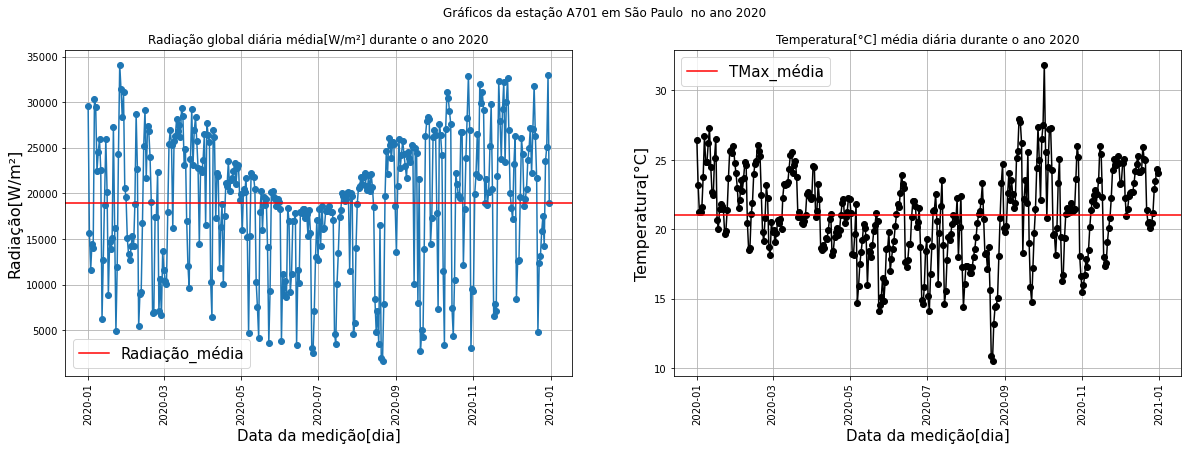

In [18]:
graficos_subplot(eda_dia ,ano_incial=2015,ano_final=2021)

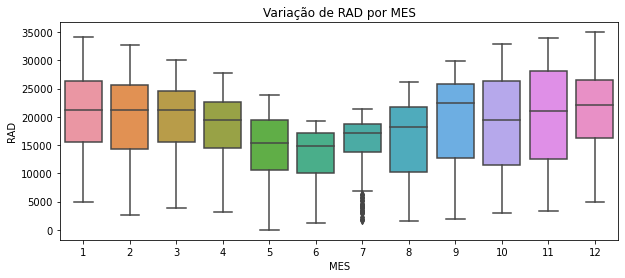

In [19]:
from funcoes_eda import box_plot
box_plot(eda_dia,x='MES', y='RAD')

# 📌Observações:

1) O primeiro gráfico é da variação da target, ou Radição, ao longo dos anos. Começando em 01-01-2015, e encerrando em 31-12-2021. As medições são das médias diárias.

2) O segundo está separado de ano a ano e com observações horárias. Tanto das radiações, quanto da temperatura máxima.

3) O terceiro é o mesmo gráfico do segundo porém agrupado as medições horárias em médias diárias. A perda de informação do horário pra média diária proporciona maior limpeza do gráfico, sendo que ambos mostram a mesma coisa(assim como o primeiro): Ao longo do periodo de um ano a radiação diminui nos períodos mais frios (no inverno), mas também tem a ver com tempo de exposição solar. No inverno os dias são mais curtos, explicado por posição e inclinação da Terra.

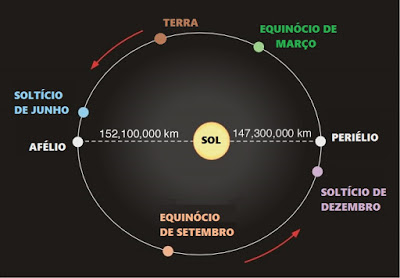


>"*Esta inclinação faz com que a orientação da Terra em relação ao Sol mude continuamente enquanto a Terra gira em torno do Sol. O Hemisfério Sul se inclina para longe do Sol durante o nosso inverno e em direção ao Sol durante o nosso verão. Isto significa que a altura do Sol, o ângulo de elevação do Sol acima do horizonte, para uma dada hora do dia (por exemplo, meio dia) varia no decorrer do ano. No hemisfério de verão as alturas do Sol são maiores, os dias mais longos e há mais radiação solar. No hemisfério de inverno as alturas do Sol são menores, os dias mais curtos e há menos radiação solar.*"[aqui](http://fisica.ufpr.br/grimm/aposmeteo/cap2/cap2-1.html)

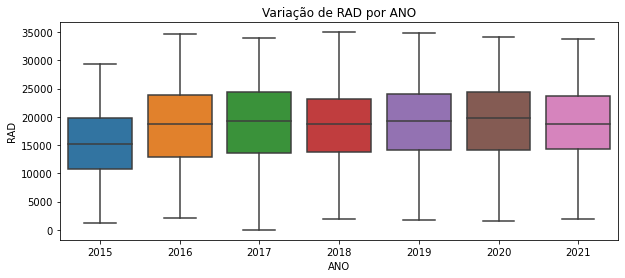

In [20]:
box_plot(eda_dia,x='ANO', y='RAD')

# 📌Observações: 

Houve um aumento bem discrepante do ano 2015 para os outros anos. 

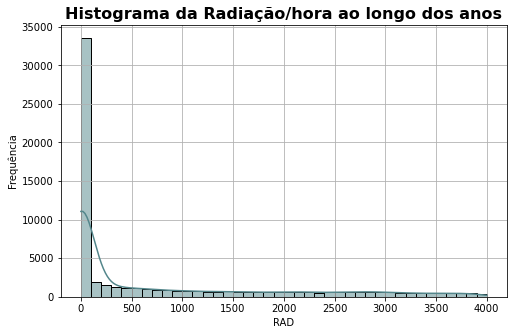

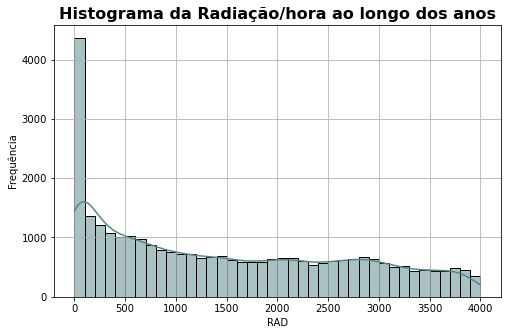

In [21]:
from funcoes_eda import gerar_histograma

gerar_histograma(eda,'RAD',bins=40,color='#53868b', titulo='Histograma da Radiação/hora ao longo dos anos')

# Retirando a soma das horas que não tem radiação
gerar_histograma(ts,'RAD',bins=40,color='#53868b', titulo='Histograma da Radiação/hora ao longo dos anos')

# 📌Observações:
 Vamos tentar melhorar pra ficar mais parecida com uma distribuição normal.
 
 1ª tentativa: Vamos fazer um groupby por dia, somando os valores da RAD.

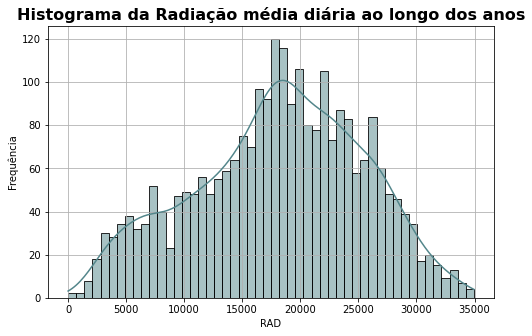

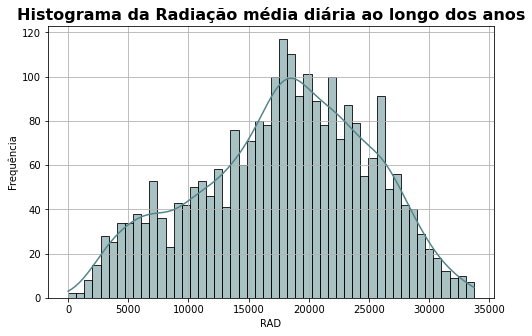

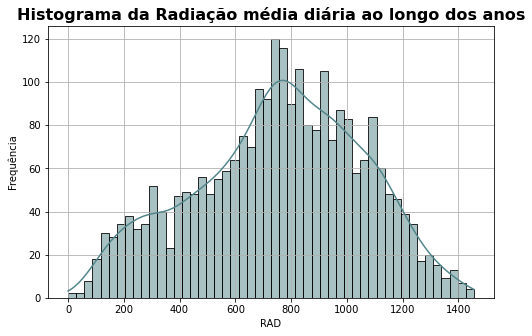

In [22]:
gerar_histograma(eda_dia,'RAD',bins=50,color='#53868b',titulo='Histograma da Radiação média diária ao longo dos anos')
gerar_histograma(ts_dia,'RAD',bins=50,color='#53868b',titulo='Histograma da Radiação média diária ao longo dos anos')


gerar_histograma(eda.groupby('DT_MEDICAO').mean(),'RAD',bins=50,color='#53868b',titulo='Histograma da Radiação média diária ao longo dos anos')

Os três histogramas acima foi para ver as mudanças conforme a escolha nas mudanças na coluna da RAD.
o primeiro foi feito um groupby pela data e utilizado a soma das Radiaçõs.
o segundo foi a mesma coisa mas antes de agrupar foi feito um tratamento para retirar os horários que não teria radiação que seria depois das 20 e antes das 7 da manhã.
E o último histograma foi feito o groupby e juntado pela média da RAD.

# 📌Observações:

Houve uma mudança grande no histograma ao mudar das medições horárias pra diárias.
Usaremos a medição diária pois mais aproximou a uma curva gaussiana.

## Verificando agora as outras variáveis:

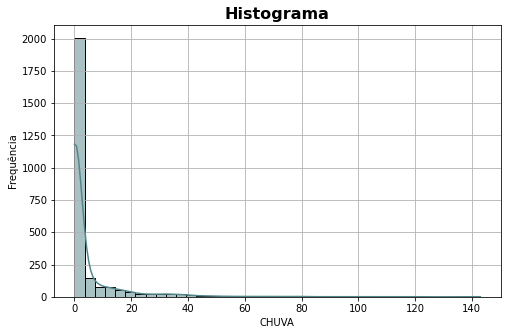

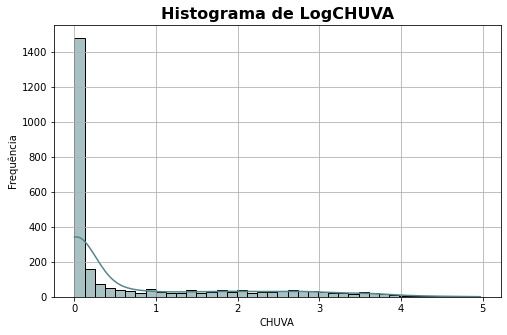

In [23]:
import numpy as np
from funcoes_eda import gerar_Log_histograma

gerar_histograma(eda_dia,'CHUVA',bins=40, color='#53868b')
gerar_Log_histograma(eda_dia,'CHUVA',bins=40, color='#53868b')

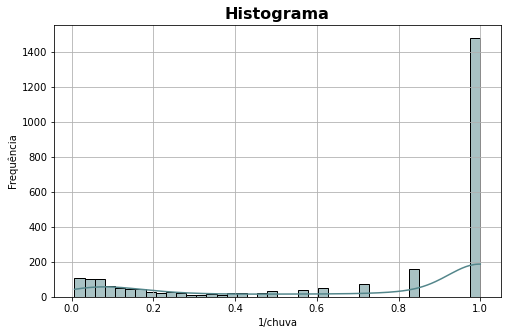

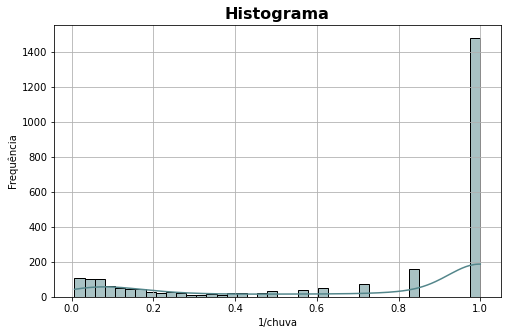

In [24]:
eda_dia['1/chuva']=1/(eda_dia['CHUVA']+1)
gerar_histograma(eda_dia,'1/chuva',bins=40,color='#53868b')
gerar_histograma(eda_dia,'1/chuva',bins=40,color='#53868b')

# 📌Observações:
A variável chuva é bem complicada, não houve nenhuma melhora com as variações. Vamos ver os plots pra tomar a decisão de como ela responde melhor ao modelo.

### Features:

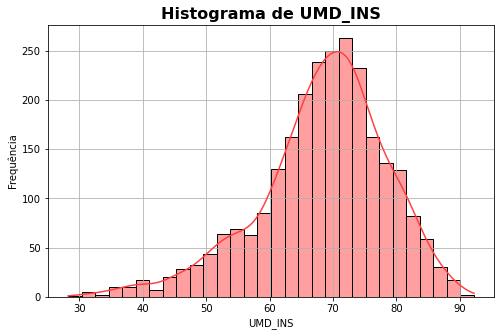

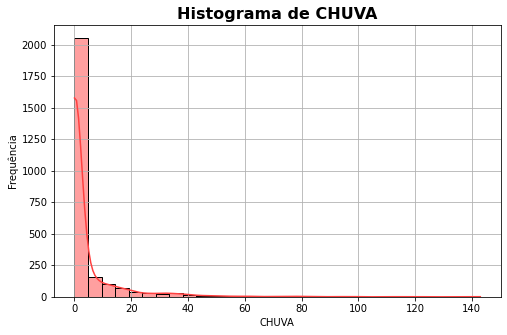

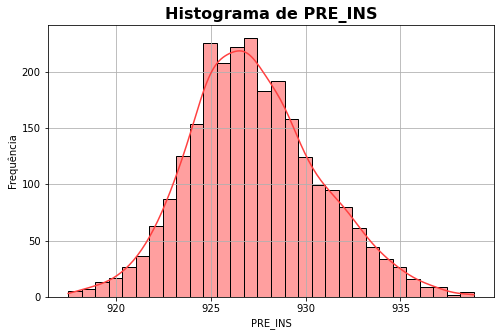

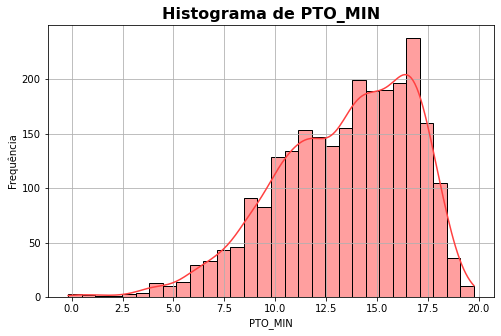

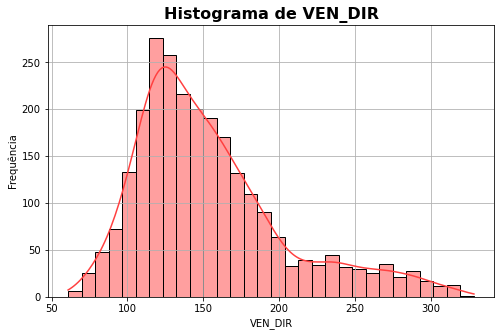

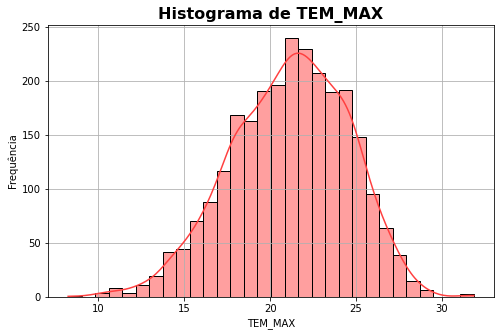

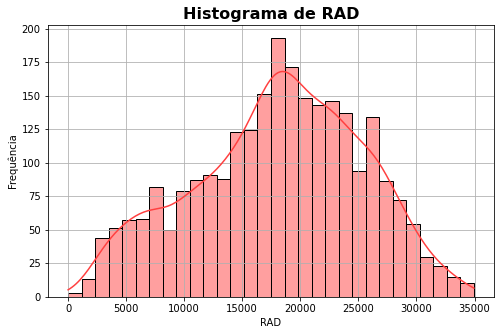

In [25]:
for col in features[4:]:
    gerar_histograma(eda_dia, col,titulo=f'Histograma de {col}' ,color='#ff4040')

# 📌Observações:

Com os histogramas podemos perceber que a única variável com a distribuição mais problemática é a chuva.

In [26]:
def transformacao_log(df, coluna):
    '''
    transforma a Serie(coluna do df) em log.
    -------------------------------------------
    parametro: df e coluna que quer transformar.
    -------------------------------------------
    retorna: a coluna em log.
    -------------------------------------------
    ex: deixa atribuido valor:
    
    df['log_Area']=transformacao_log(df,'Area')
    '''
    if df[coluna].min()==0:
        df[f'log_{coluna}']=np.log(df[coluna]+1)
    else:
        df[f'log_{coluna}']=np.log(df[coluna])

    return df[f'log_{coluna}']

for coluna in var_numericas:
    transformacao_log(eda_dia,coluna)

In [27]:
eda_dia.head()

RAD  CHUVA   ANO  MES     PRE_INS  UMD_INS    PTO_MIN  \
DT_MEDICAO                                                                
2015-01-01  28172.702    0.0  2015    1  924.441667   52.500  15.591667   
2015-01-02  21412.210    0.2  2015    1  924.295833   53.750  16.258333   
2015-01-03  13982.863    1.4  2015    1  926.641667   73.875  19.008333   
2015-01-04  13622.406    0.0  2015    1  927.608333   71.875  17.550000   
2015-01-05  14505.361   12.6  2015    1  927.804167   76.250  17.591667   

               VEN_DIR    TEM_MAX   1/chuva  log_UMD_INS  log_CHUVA  \
DT_MEDICAO                                                            
2015-01-01  289.541667  27.779167  1.000000     3.960813   0.000000   
2015-01-02  261.250000  27.870833  0.833333     3.984344   0.182322   
2015-01-03  134.208333  25.125000  0.416667     4.302374   0.875469   
2015-01-04  180.083333  24.050000  1.000000     4.274928   0.000000   
2015-01-05  109.666667  23.391667  0.073529     4.334017   2.610070   

            log_PRE_INS  log_PTO_MIN  log_VEN_DIR  log_TEM_MAX    log_RAD  
DT_MEDICAO                                                                 
2015-01-01     6.829190     2.746737     5.668299     3.324286  10.246144  
2015-01-02     6.829032     2.788606     5.565478     3.327581   9.971763  
2015-01-03     6.831567     2.944877     4.899393     3.223863   9.545659  
2015-01-04     6.832610     2.865054     5.193420     3.180135   9.519545  
2015-01-05     6.832821     2.867425     4.697445     3.152380   9.582343

In [28]:
from scipy.stats import shapiro, normaltest

def test(df,col, test):
    vetor = df[col]
    stat, p = test(vetor)
    print('Normal' if p>0.05 else 'Not normal')
    return 'Normal' if p>0.05 else 'Not normal'

for col in eda_dia.columns:
    print('Teste = Shapiro')
    print('coluna:', col)
    test(eda_dia,col, shapiro)
    print('-=-'*10)
    print('Teste = Normaltest')
    print('coluna:', col)
    test(eda_dia,col, normaltest)
    print('-=-'*10)

Teste = Shapiro
coluna: RAD
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: RAD
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: CHUVA
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: CHUVA
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: ANO
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: ANO
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: MES
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: MES
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: PRE_INS
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: PRE_INS
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: UMD_INS
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: UMD_INS
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Shapiro
coluna: PTO_MIN
Not normal
-=--=--=--=--=--=--=--=--=--=-
Teste = Normaltest
coluna: PTO_MIN
Not normal
-=

In [29]:
eda_dia.columns[:]

Index(['RAD', 'CHUVA', 'ANO', 'MES', 'PRE_INS', 'UMD_INS', 'PTO_MIN',
       'VEN_DIR', 'TEM_MAX', '1/chuva', 'log_UMD_INS', 'log_CHUVA',
       'log_PRE_INS', 'log_PTO_MIN', 'log_VEN_DIR', 'log_TEM_MAX', 'log_RAD'],
      dtype='object')

In [30]:
from scipy.stats import anderson
def test(vetor, test):
    from scipy.stats import anderson
    stat, critico , alpha = test(vetor)
    if (stat<critico[2]):
        print('Com '+str(100 - alpha[2])+'% confiança, similar a normal')
    else:
        print('Com '+str(100 - alpha[2])+'% confiança,NÃO similar a normal')
    print  (stat, critico , alpha)

for col in eda_dia.columns:
    print('Teste = Shapiro')
    print('coluna:', col)
    test(eda_dia[col], anderson)
    print('-*-'*10)

Teste = Shapiro
coluna: RAD
Com 95.0% confiança,NÃO similar a normal
8.531524157481272 [0.575 0.655 0.786 0.917 1.09 ] [15.  10.   5.   2.5  1. ]
-*--*--*--*--*--*--*--*--*--*-
Teste = Shapiro
coluna: CHUVA
Com 95.0% confiança,NÃO similar a normal
529.9273313712501 [0.575 0.655 0.786 0.917 1.09 ] [15.  10.   5.   2.5  1. ]
-*--*--*--*--*--*--*--*--*--*-
Teste = Shapiro
coluna: ANO
Com 95.0% confiança,NÃO similar a normal
60.57550585005538 [0.575 0.655 0.786 0.917 1.09 ] [15.  10.   5.   2.5  1. ]
-*--*--*--*--*--*--*--*--*--*-
Teste = Shapiro
coluna: MES
Com 95.0% confiança,NÃO similar a normal
38.484454062912846 [0.575 0.655 0.786 0.917 1.09 ] [15.  10.   5.   2.5  1. ]
-*--*--*--*--*--*--*--*--*--*-
Teste = Shapiro
coluna: PRE_INS
Com 95.0% confiança,NÃO similar a normal
5.876232186771631 [0.575 0.655 0.786 0.917 1.09 ] [15.  10.   5.   2.5  1. ]
-*--*--*--*--*--*--*--*--*--*-
Teste = Shapiro
coluna: UMD_INS
Com 95.0% confiança,NÃO similar a normal
18.62705143765197 [0.575 0.655 0.78

# 📌Observações:
Mesmo com os histogramas semelhantes à curva de Gauss, nenhuma resultou em uma distribuição similar a normal.

## Target com variáveis:

In [31]:
var_num = var_numericas+['log_UMD_INS', 'log_CHUVA','log_PRE_INS', 'log_PTO_MIN', 'log_VEN_DIR', 'log_TEM_MAX']

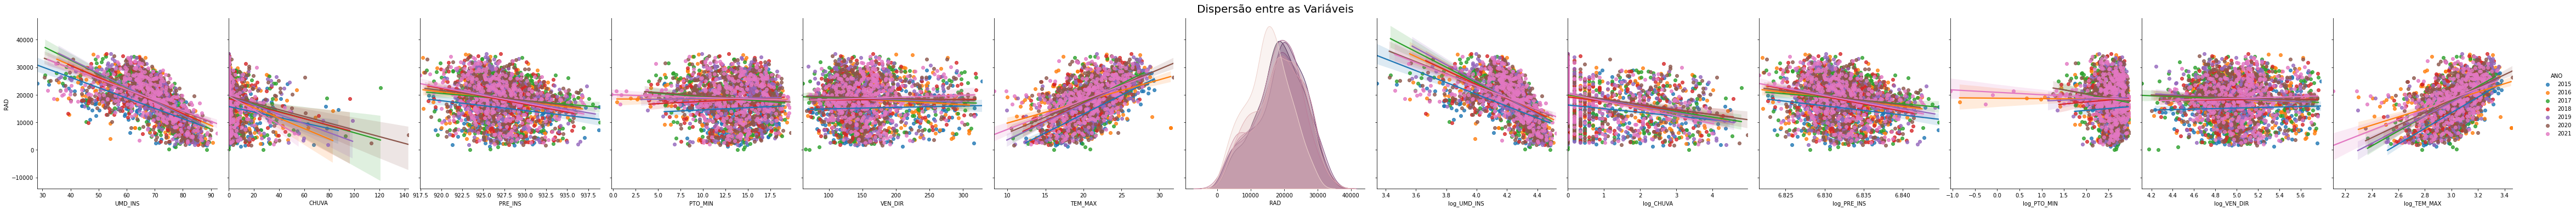

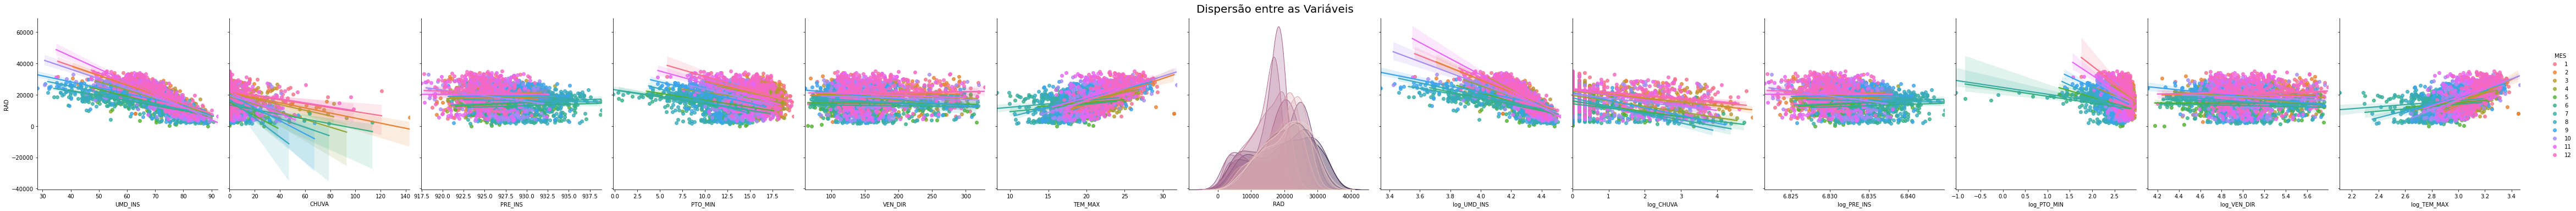

In [38]:
# numéricoX numérico com hue= categóricas
for var_categorica in var_categoricas:
    import seaborn as sns
    ax = sns.pairplot(eda_dia, y_vars=target,x_vars= var_num,hue=var_categorica,kind='reg',height=5)
    ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05);

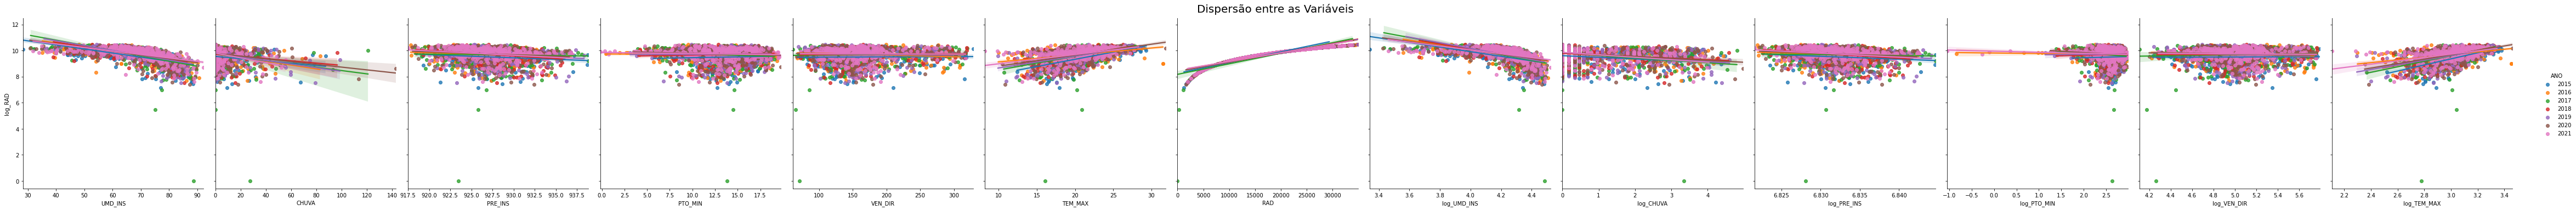

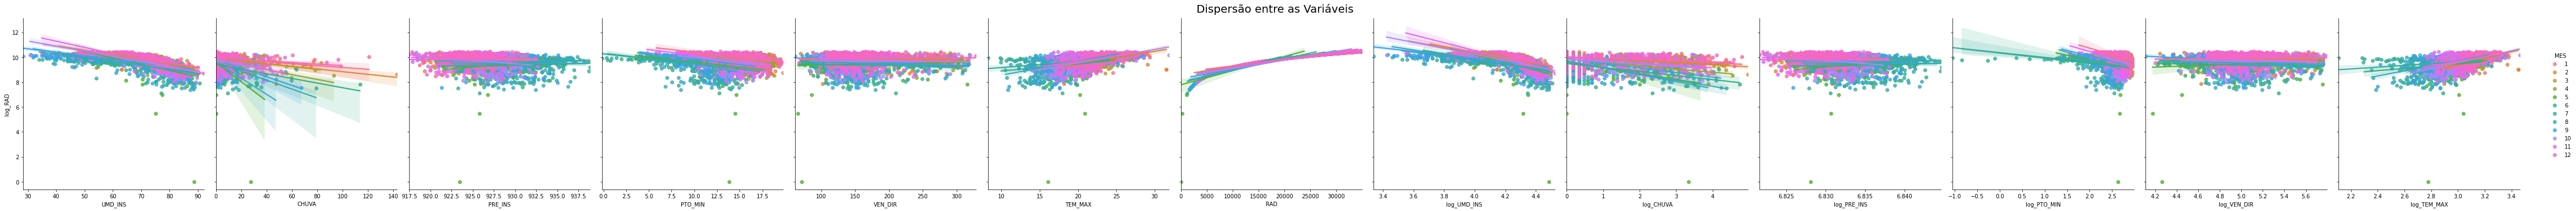

In [44]:
# numéricoX numérico com hue= categóricas
for var_categorica in var_categoricas:
    import seaborn as sns
    ax = sns.pairplot(eda_dia, y_vars='log_RAD',x_vars= var_num,hue=var_categorica,kind='reg',height=5)
    ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05);

# 📌Observações:

Com o log na variável independente parece que fez a regressão ficar mais concentrarda perto da reta, mesmo que aparece alguns outliers. O da chuva dá uma melhora siginificativa, com o log. 


### Plot Radiação, Chuva e Umidade no dia

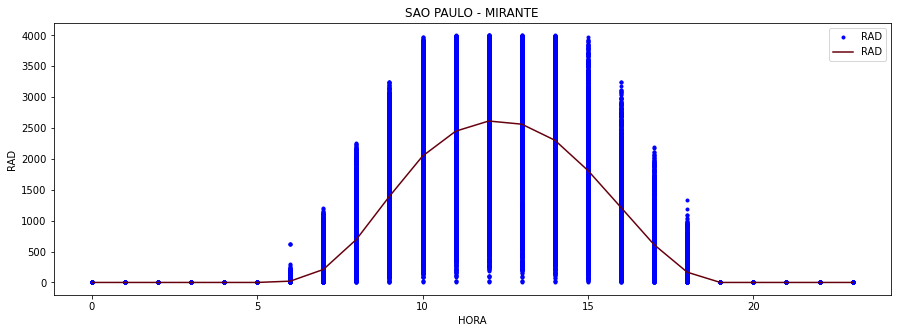

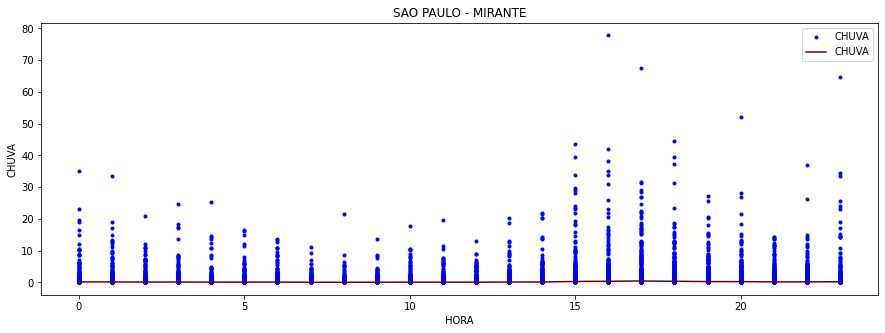

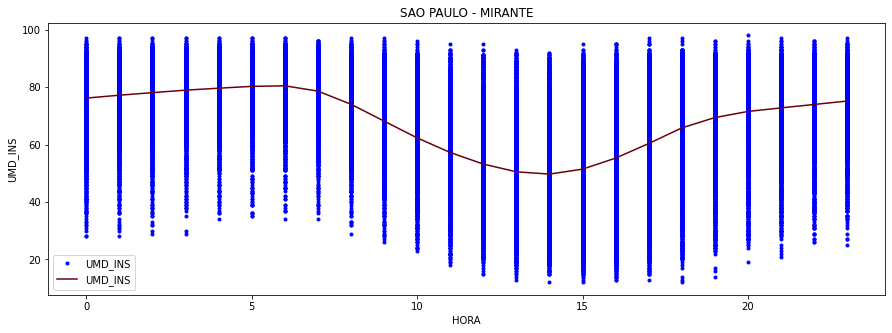

In [40]:
cols=['RAD', 'CHUVA', 'UMD_INS']
from funcoes_eda import EDA_PLOT
EDA_PLOT(df, cols)

In [41]:
#criando a coluna ano
df.loc[:,'DAY'] = df.loc[:,'DT_MEDICAO'].dt.day

In [42]:
df.head()

DC_NOME  PRE_INS  TEM_SEN  VL_LATITUDE  PRE_MAX  UF  RAD_GLO  \
0  SAO PAULO - MIRANTE    925.5     25.1   -23.496294    925.5  SP    -3.54   
1  SAO PAULO - MIRANTE    926.0     25.5   -23.496294    926.0  SP    -3.54   
2  SAO PAULO - MIRANTE    925.5     25.1   -23.496294    926.0  SP    -3.54   
3  SAO PAULO - MIRANTE    925.0     24.5   -23.496294    925.5  SP    -3.54   
4  SAO PAULO - MIRANTE    924.5     24.3   -23.496294    925.0  SP    -3.54   

   PTO_INS  TEM_MIN  VL_LONGITUDE  UMD_MIN  PTO_MAX  VEN_DIR DT_MEDICAO  \
0     16.8     25.5    -46.620088     57.0     17.1    344.0 2015-01-01   
1     15.7     25.4    -46.620088     52.0     16.8    306.0 2015-01-01   
2     15.7     25.4    -46.620088     53.0     16.0    303.0 2015-01-01   
3     16.5     25.3    -46.620088     53.0     16.5    297.0 2015-01-01   
4     17.2     25.0    -46.620088     58.0     17.2      3.0 2015-01-01   

   CHUVA  PRE_MIN  UMD_MAX  VEN_VEL  PTO_MIN  TEM_MAX  VEN_RAJ  TEM_INS  \
0    0.0    924.7     60.0      1.7     16.4     25.7      5.7     25.5   
1    0.0    925.5     59.0      0.8     15.2     25.9      4.8     25.4   
2    0.0    925.5     56.0      1.6     15.4     25.8      5.1     25.7   
3    0.0    925.0     58.0      2.0     15.3     25.7      4.9     25.3   
4    0.0    924.5     62.0      2.1     16.5     25.4      4.4     25.0   

   UMD_INS CD_ESTACAO  HR_MEDICAO  HORA  RAD  MES   ANO  DAY  
0     59.0       A701           0    21  0.0    1  2015    1  
1     55.0       A701         100    22  0.0    1  2015    1  
2     54.0       A701         200    23  0.0    1  2015    1  
3     58.0       A701         300     0  0.0    1  2015    1  
4     62.0       A701         400     1  0.0    1  2015    1

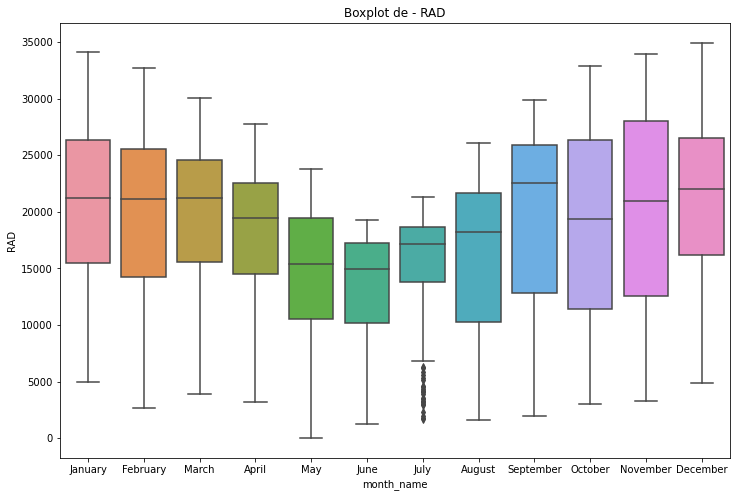

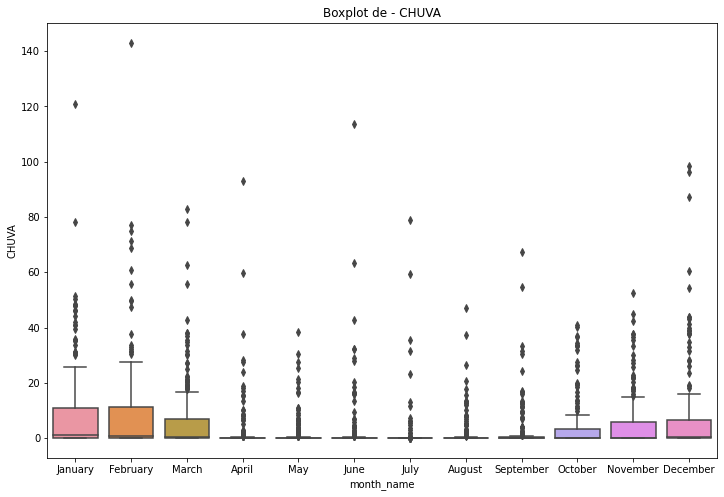

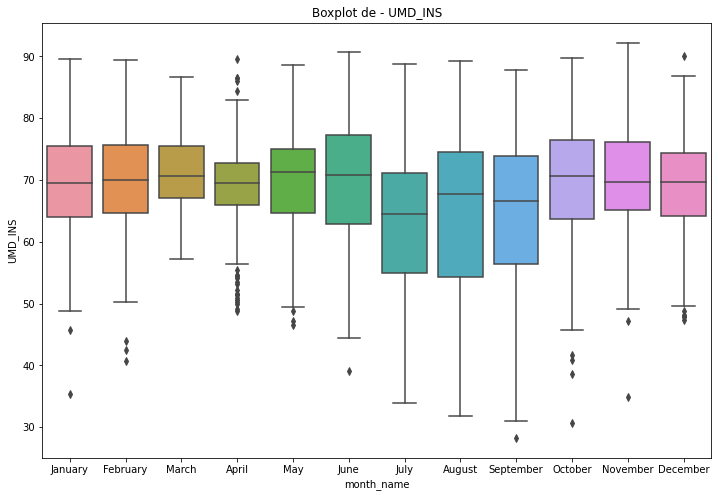

In [48]:
cols=['RAD', 'CHUVA', 'UMD_INS']

from funcoes_eda import EDA_boxplot
EDA_boxplot(df, cols)

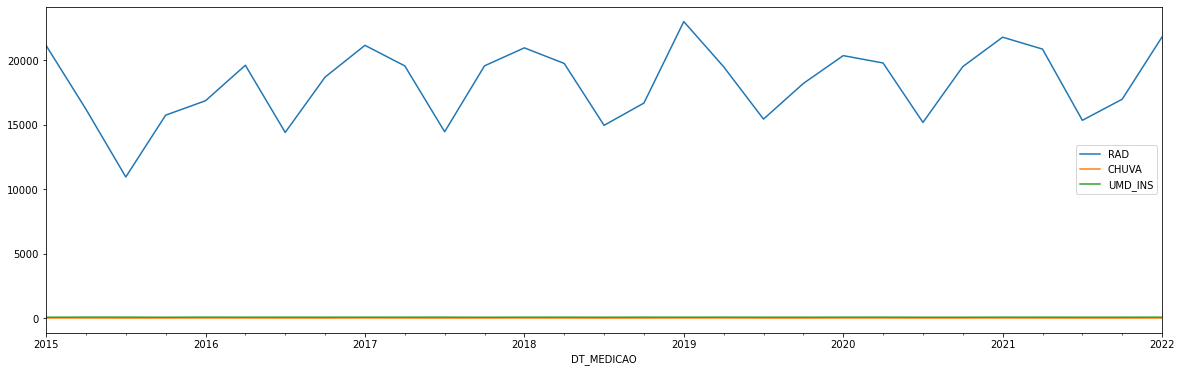

In [49]:
#A Cada mês
eda_dia[cols].resample('3M').mean().plot(figsize=(20, 6));

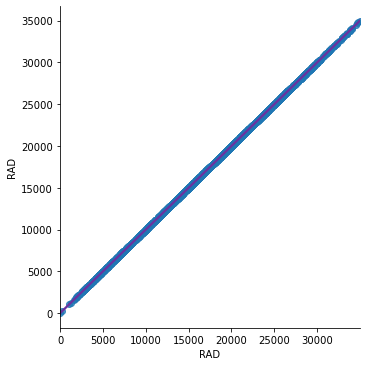

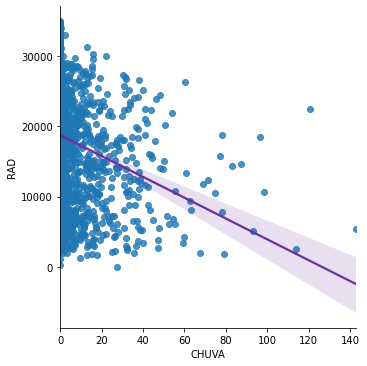

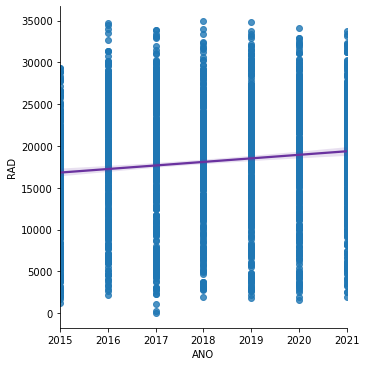

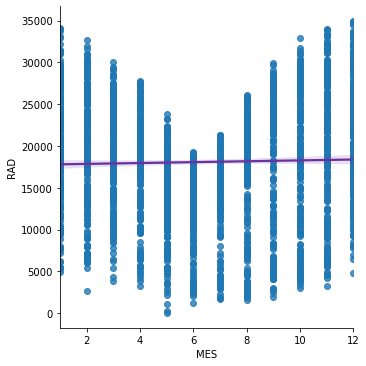

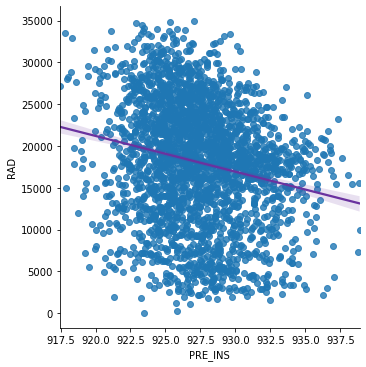

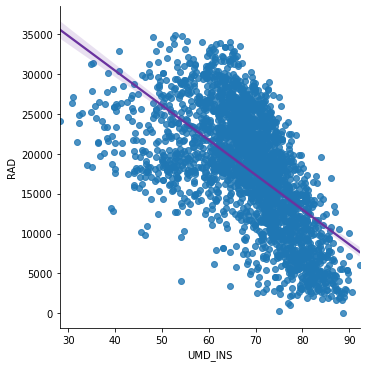

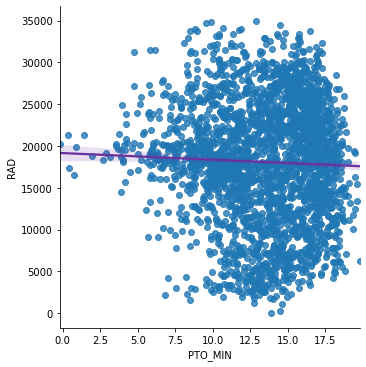

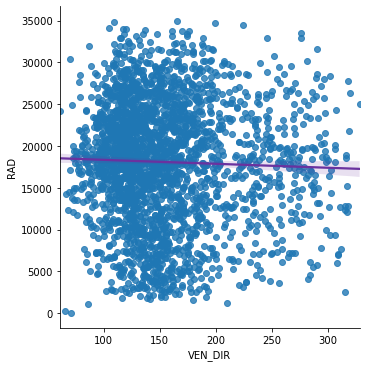

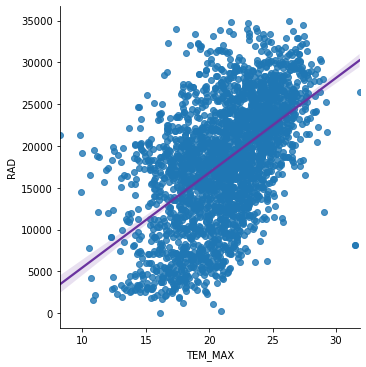

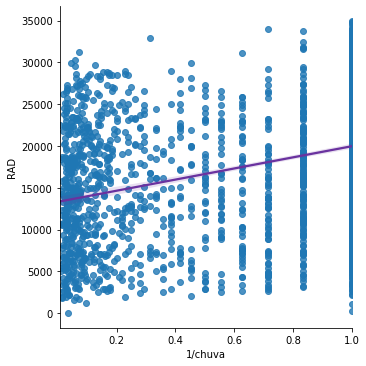

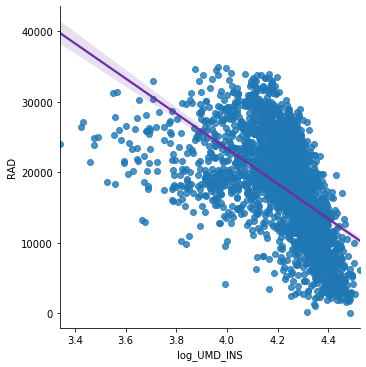

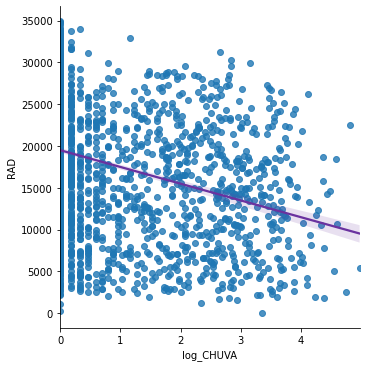

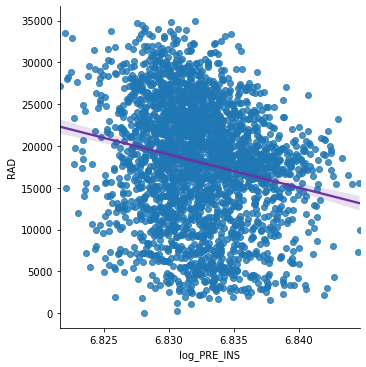

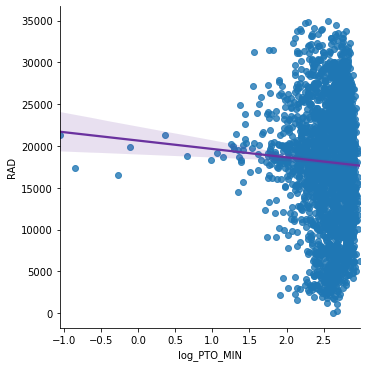

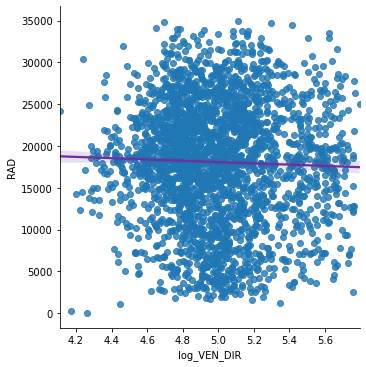

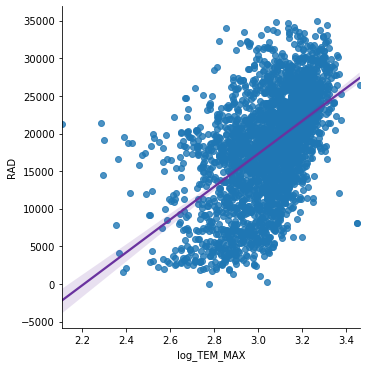

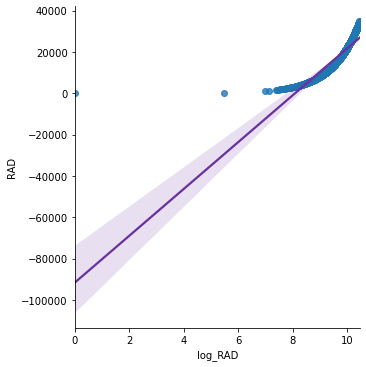

In [50]:
import matplotlib.pyplot as plt
for col in eda_dia.columns:
    sns.lmplot(x=col, y='RAD', data=eda_dia,line_kws={'color':'#6a329f'})
    plt.show()

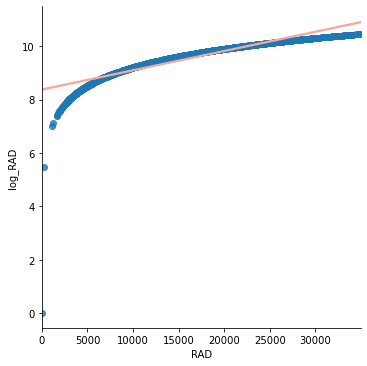

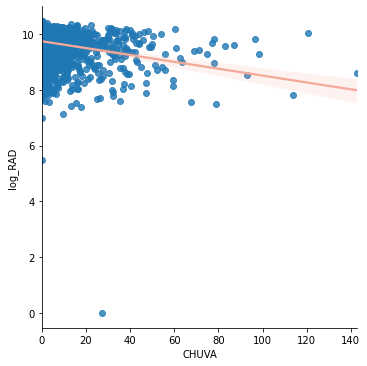

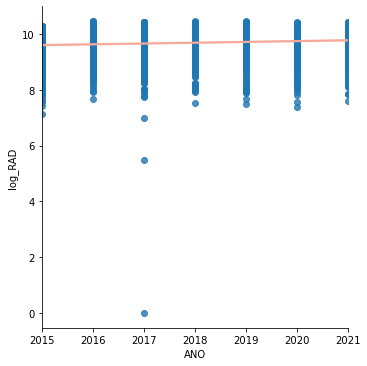

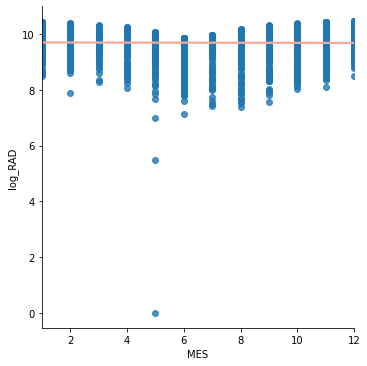

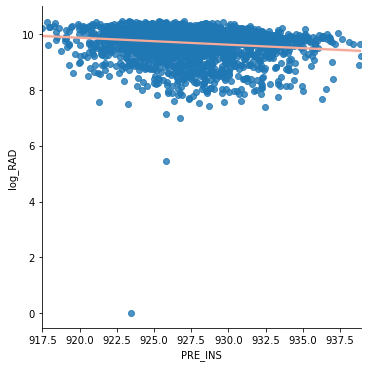

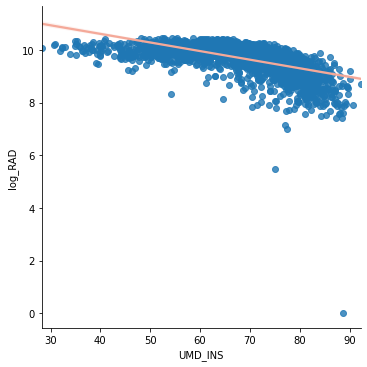

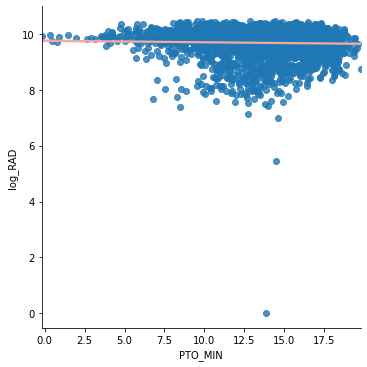

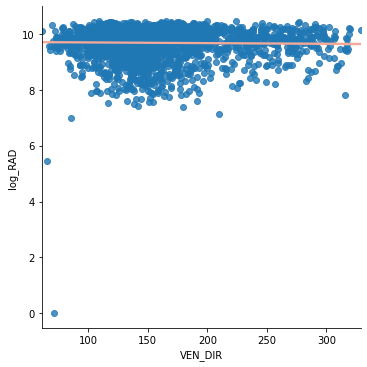

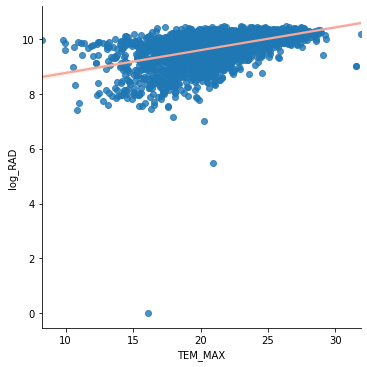

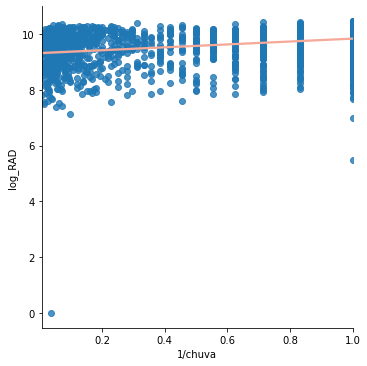

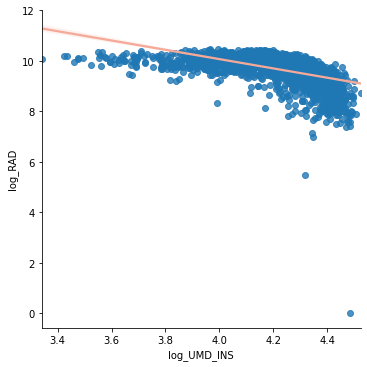

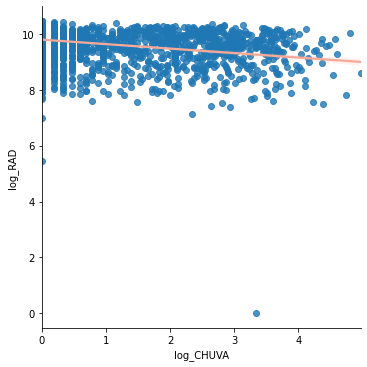

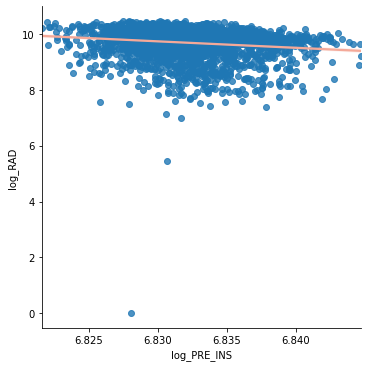

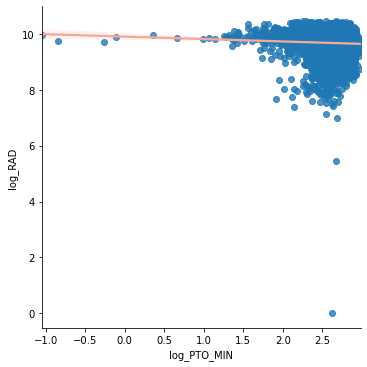

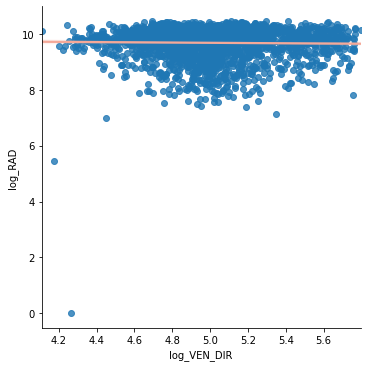

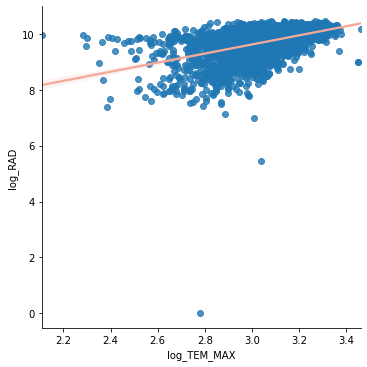

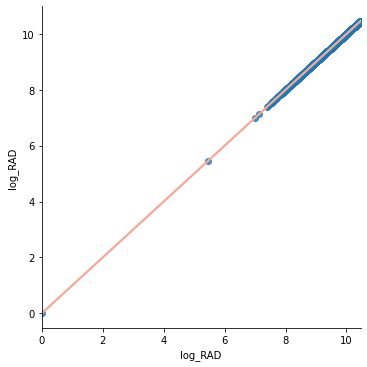

In [51]:
import matplotlib.pyplot as plt
for col in eda_dia.columns:
    sns.lmplot(x=col, y='log_RAD', data=eda_dia,line_kws={'color':'#f4a999'})
    plt.show()